In [1]:
import numpy as np

A = np.array([
    [3, 1, 1],
    [1, 2, 1],
    [0, -1, 1]
])

b1 = np.array([1, 2, 3])
b2 = np.array([2, 4, 5])

In [2]:
np.linalg.solve(A, b1)

array([-0.57142857, -0.14285714,  2.85714286])

/Users/katouseimitsuru/.pyenv/versions/3.7.4/envs/machine_learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/katouseimitsuru/.pyenv/versions/3.7.4/envs/machine_learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/katouseimitsuru/.pyenv/versions/3.7.4/envs/machine_learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


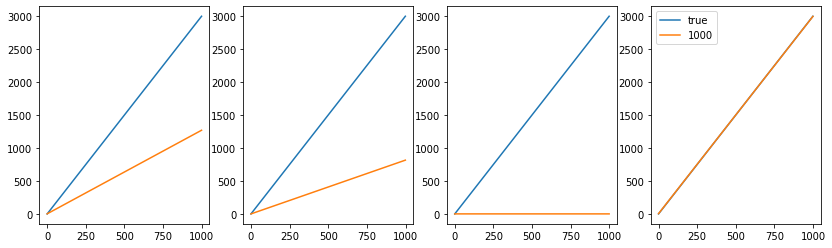

In [15]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPRegressor

a = np.arange(1000)
b = 3 * a

fig, axes = plt.subplots(1, 4, figsize=(14, 4))
for j, i in enumerate([1, 10, 100, 1000]):
    estimator = MLPRegressor(hidden_layer_sizes=(1, ), max_iter=i)
    estimator.fit(a[:, np.newaxis], b)
    axes[j].plot(a, b, label='true')
    axes[j].plot(a, estimator.predict(a[:, np.newaxis]), label=f'{i}')
plt.legend()

/Users/katouseimitsuru/.pyenv/versions/3.7.4/envs/machine_learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/katouseimitsuru/.pyenv/versions/3.7.4/envs/machine_learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/katouseimitsuru/.pyenv/versions/3.7.4/envs/machine_learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/katouseimitsuru/.pyenv/versions/3.7.4/envs/machine_learning/lib/python3.7/site

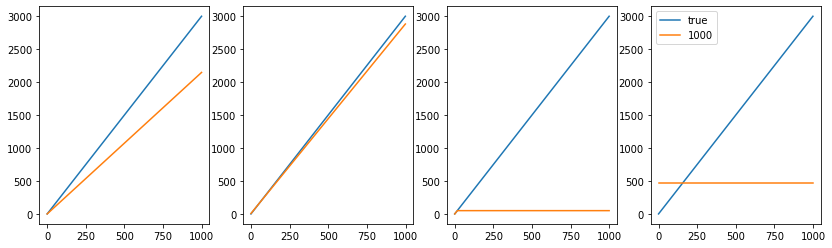

In [16]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPRegressor

a = np.arange(1000)
b = 3 * a

fig, axes = plt.subplots(1, 4, figsize=(14, 4))
for j, i in enumerate([1, 10, 100, 1000]):
    estimator = MLPRegressor(hidden_layer_sizes=(1, ), max_iter=i, learning_rate_init=0.1)
    estimator.fit(a[:, np.newaxis], b)
    axes[j].plot(a, b, label='true')
    axes[j].plot(a, estimator.predict(a[:, np.newaxis]), label=f'{i}')
plt.legend()

### Q-tableをを線形モデルで表現して学習してみる

In [19]:
import numpy as np

# 状態を表現するベクトル( x, x <= 3, 3 < x <= 7, 7 < x)
# x = 4
s = np.array([4, 0, 1, 0])

# Q-function
Q = np.zeros((s.size, 5))

# 行動評価ベクトルを返す

a = s @ Q

print(a)

[0. 0. 0. 0. 0.]


In [21]:
s.T @ s * Q

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [8]:
np.random.uniform(size = (4, 5))

(4, 5)

In [24]:
import numpy as np

b = np.array([2, 4, 5])
B = np.vstack([b] * 3).T
print(B)
B @ np.diag([1, 2, 3])

[[2 2 2]
 [4 4 4]
 [5 5 5]]


array([[ 2,  4,  6],
       [ 4,  8, 12],
       [ 5, 10, 15]])

$ a \in \mathbb{R}^5, s \in \mathbb{R}^4, Q \in \mathbb{R}^{4 \times 5} $  
行動評価ベクトル$ \mathbb{u} = (u_1, u_2, u_3, u_4, u_5) = f(s) = s^T Q = s^T (\mathbb{q_1}, \mathbb{q_2}, \mathbb{q_3}, \mathbb{q_4}, \mathbb{q_5})$  
  
ここで損失関数を以下のように定義すると

$$
L = \frac{1}{2} \| \mathbb{u} - f(s)\|^2
$$

そのパラメーター行列Qの列ベクトルの勾配は  
$$ 
\begin{align}
    \frac{\partial L}{\partial \mathbb{q_i}} 
      &= \frac{1}{2} \{\frac{\partial (u_1 - s^T \mathbb{q_i})^T}{\partial \mathbb{q_i}}(u_i - s^T\mathbb{q_i}) + (u_i - s^T\mathbb{q_i})^T  \frac{\partial (u_i - s^T \mathbb{q_i})}{\partial \mathbb{q_i}}\} \\
      &= \frac{1}{2} \{ -s(u_i = s^T \mathbb{q_i}) - (u_1 - s^T \mathbb{q_i})^T s^T \} \\
      &= s(s^T \mathbb{q_i} - u_i) \\
\end{align}
$$

行列で書くと
$$
\begin{align}
\frac{\partial L}{\partial \mathbb{Q}} &= (\frac{\partial L}{\partial \mathbb{q_1}}, \frac{\partial L}{\partial \mathbb{q_2}},\frac{\partial L}{\partial \mathbb{q_3}},\frac{\partial L}{\partial \mathbb{q_4}},\frac{\partial L}{\partial \mathbb{q_5}}) \\
 &= (s(s^T \mathbb{q_1} - u_1), s(s^T \mathbb{q_2} - u_2),s(s^T \mathbb{q_3} - u_3),s(s^T \mathbb{q_4} - u_4), s(s^T \mathbb{q_5} - u_5)) \\
 &= (ss^T \mathbb{q_1} - u_1 s, ss^T \mathbb{q_2} - u_2 s, ss^T \mathbb{q_3} - u_3 s, ss^T \mathbb{q_4} - u_4 s, ss^T \mathbb{q_5} - u_5 s) \\
 &= (ss^T\mathbb{q_1}, ss^T\mathbb{q_2}, ss^T\mathbb{q_3}, ss^T\mathbb{q_4}, ss^T\mathbb{q_5}) - (u_1 s, u_2s, u_3s, u_4s, u_5s) \\
 &= s s^T (\mathbb{q_1}, \mathbb{q_2}, \mathbb{q_3}, \mathbb{q_4}, \mathbb{q_5}) - (s, s, s, s, s) diag(\mathbb{u}) \\
 &= s s^T \mathbb{Q} - (s, s, s, s, s) diag(\mathbb{u})
 \end{align}
$$

In [36]:
a = np.array([1, 2, 3])
B = np.array(
    [np.arange(9).reshape(3, 3)] * 3
)

print(B.shape)
print(a[:, np.newaxis, np.newaxis])
print(B)
a[:, np.newaxis, np.newaxis] * B

(3, 3, 3)
[[[1]]

 [[2]]

 [[3]]]
[[[0 1 2]
  [3 4 5]
  [6 7 8]]

 [[0 1 2]
  [3 4 5]
  [6 7 8]]

 [[0 1 2]
  [3 4 5]
  [6 7 8]]]


array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]],

       [[ 0,  3,  6],
        [ 9, 12, 15],
        [18, 21, 24]]])